In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
tablet = pd.read_csv(r"C:\Users\bedir\OneDrive\Desktop\EDA\data\tablet.csv")

In [4]:
tablet.head()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1TB,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi


In [5]:
#Güncel INR/USD kuru (örnek olarak)
inr_to_usd_rate = 0.012  # 1 INR = 0.012 USD (güncel kur değişebilir)
tablet['price'] = tablet['price']*inr_to_usd_rate

In [6]:
tablet.head()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,599.880,Snapdragon,8.0,3.2,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,261.948,Snapdragon,8.0,2.2,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1TB,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,221.988,Snapdragon,8.0,3.2,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,347.988,Snapdragon,8.0,3.2,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,245.988,Snapdragon,8.0,3.2,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi


In [7]:
tablet.shape

(390, 29)

In [8]:
tablet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             390 non-null    int64  
 1   name                   390 non-null    object 
 2   brand                  390 non-null    object 
 3   rating                 390 non-null    float64
 4   price                  390 non-null    float64
 5   processor_brand        379 non-null    object 
 6   num_processor          379 non-null    float64
 7   processor_speed        325 non-null    float64
 8   ram                    365 non-null    float64
 9   memory_inbuilt         387 non-null    float64
 10  battery_capacity       359 non-null    float64
 11  charger                208 non-null    float64
 12  charging               229 non-null    object 
 13  display_size_inches    389 non-null    float64
 14  pixel                  384 non-null    object 
 15  resolu

<Axes: xlabel='brand'>

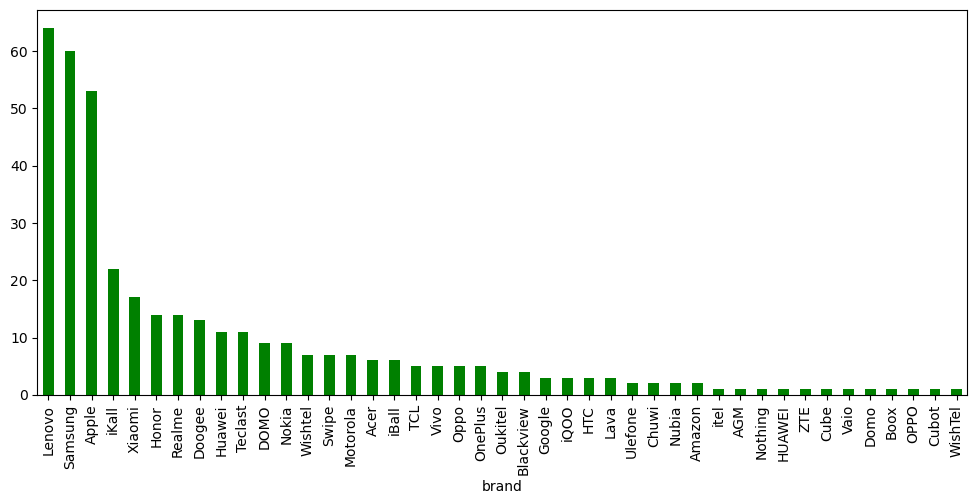

In [9]:
tablet['brand'].value_counts().plot(kind='bar',color='green',figsize=(12,5)) 


In [10]:
tablet.columns


Index(['Unnamed: 0', 'name', 'brand', 'rating', 'price', 'processor_brand',
       'num_processor', 'processor_speed', 'ram', 'memory_inbuilt',
       'battery_capacity', 'charger', 'charging', 'display_size_inches',
       'pixel', 'resolution_width', 'resolution_height', 'ppi',
       'frequency_display_hz', 'primary_front_camera', 'secondry_front_camera',
       'primary_rear_camera', 'secondry_rear_camera', 'os_brand', 'version',
       'memory_card_upto', 'sim', 'is_5G', 'is_wifi'],
      dtype='object')

In [11]:
tablet.drop(['Unnamed: 0','brand','name','processor_brand','charger','charging','frequency_display_hz','secondry_front_camera','secondry_rear_camera','os_brand','version','memory_card_upto','sim','is_5G','is_wifi','pixel'],axis=1,inplace=True)

In [12]:
tablet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                390 non-null    float64
 1   price                 390 non-null    float64
 2   num_processor         379 non-null    float64
 3   processor_speed       325 non-null    float64
 4   ram                   365 non-null    float64
 5   memory_inbuilt        387 non-null    float64
 6   battery_capacity      359 non-null    float64
 7   display_size_inches   389 non-null    float64
 8   resolution_width      384 non-null    float64
 9   resolution_height     384 non-null    float64
 10  ppi                   384 non-null    float64
 11  primary_front_camera  386 non-null    float64
 12  primary_rear_camera   385 non-null    float64
dtypes: float64(13)
memory usage: 39.7 KB


In [13]:
 
columns=[ 'num_processor', 'processor_speed', 'ram','memory_inbuilt',
       'battery_capacity', 'display_size_inches',
       'resolution_width', 'resolution_height', 'ppi', 'primary_front_camera',
       'primary_rear_camera']

for i in columns:
    tablet[i]=tablet[i].fillna(tablet[i].mean())

In [14]:
tablet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                390 non-null    float64
 1   price                 390 non-null    float64
 2   num_processor         390 non-null    float64
 3   processor_speed       390 non-null    float64
 4   ram                   390 non-null    float64
 5   memory_inbuilt        390 non-null    float64
 6   battery_capacity      390 non-null    float64
 7   display_size_inches   390 non-null    float64
 8   resolution_width      390 non-null    float64
 9   resolution_height     390 non-null    float64
 10  ppi                   390 non-null    float64
 11  primary_front_camera  390 non-null    float64
 12  primary_rear_camera   390 non-null    float64
dtypes: float64(13)
memory usage: 39.7 KB


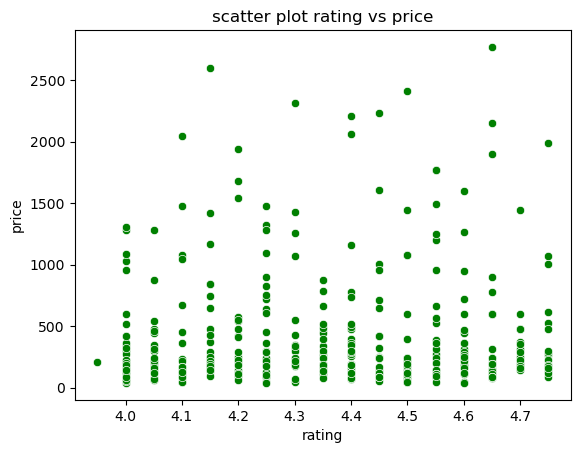

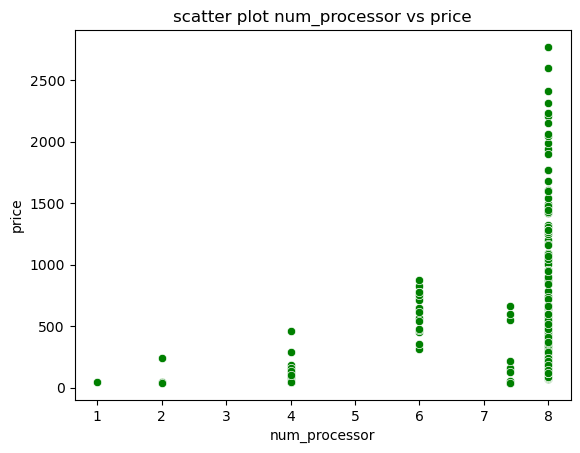

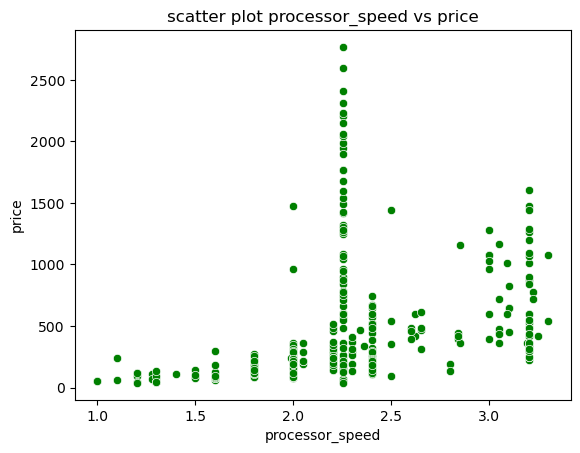

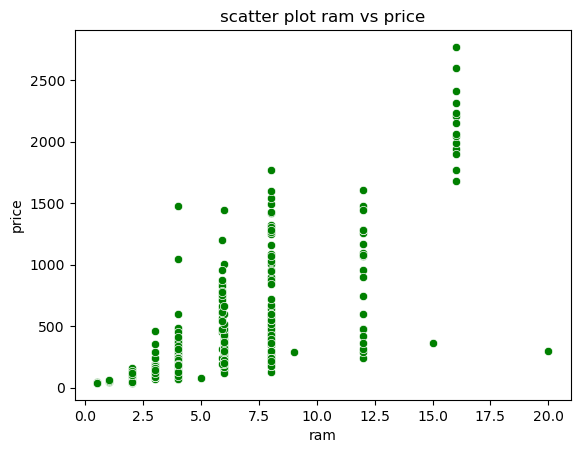

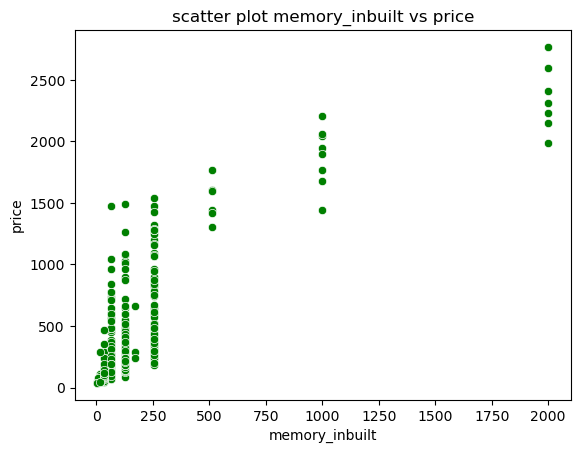

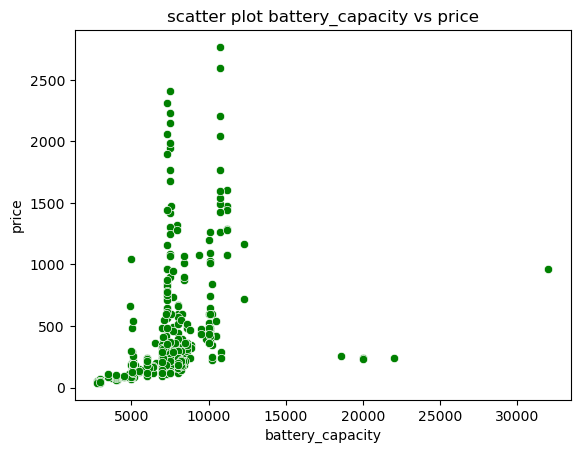

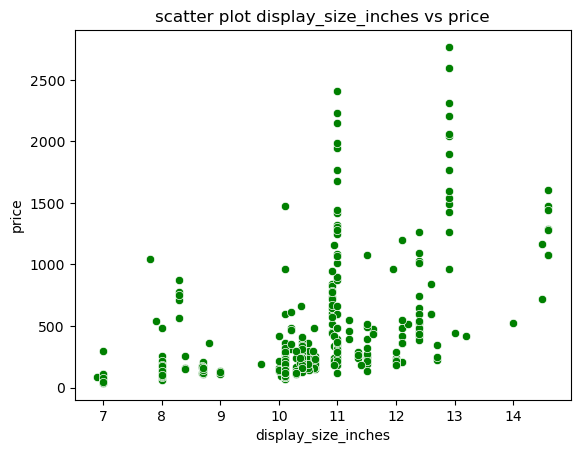

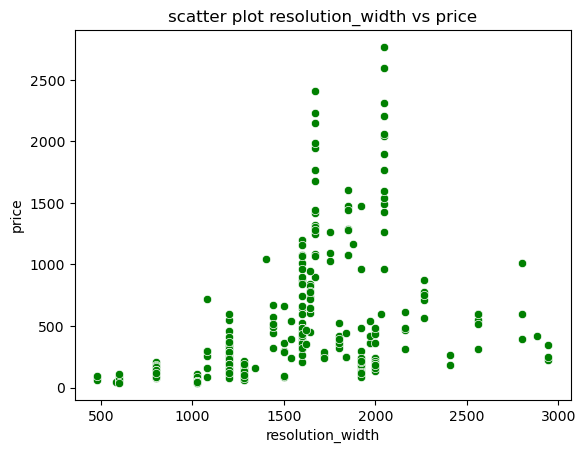

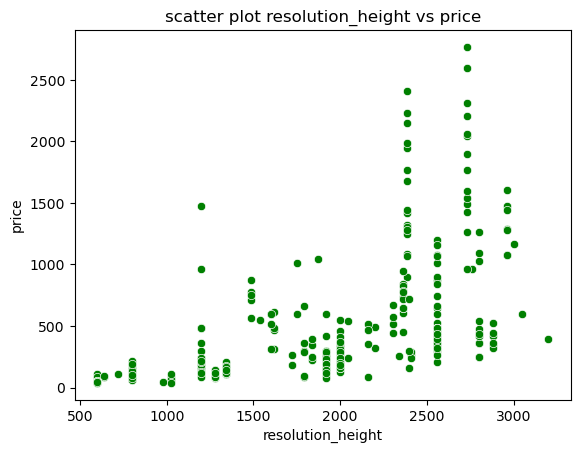

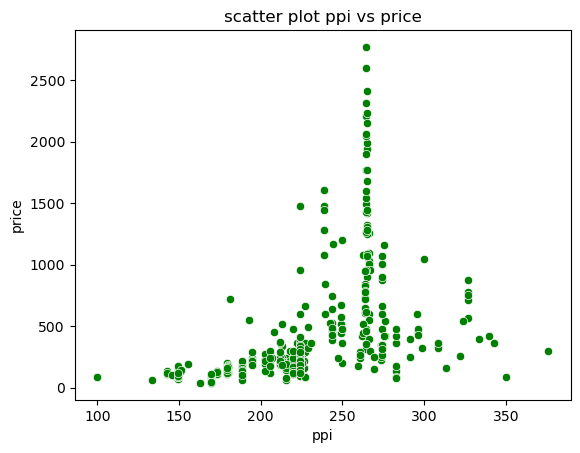

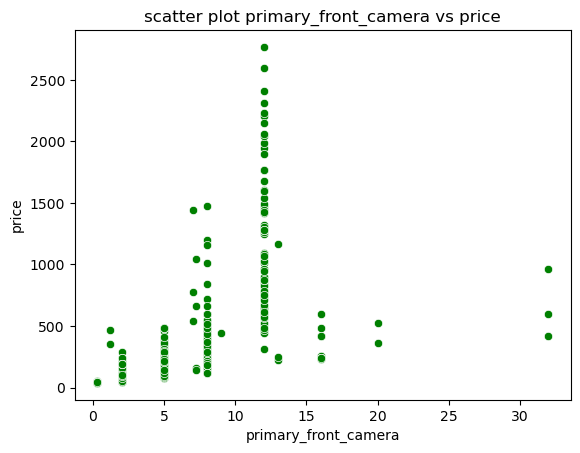

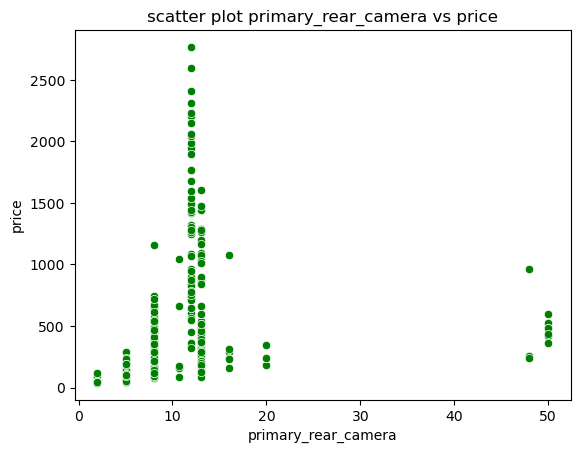

In [15]:
columns=['rating', 'num_processor', 'processor_speed', 'ram',
       'memory_inbuilt', 'battery_capacity', 'display_size_inches',
       'resolution_width', 'resolution_height', 'ppi', 'primary_front_camera',
       'primary_rear_camera']

for i in columns:
    sns.scatterplot(x=tablet[i],y=tablet['price'],color='green')
    plt.title('scatter plot {} vs price'.format(i))
    plt.show()

In [16]:
tablet.head()

,rating,price,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,display_size_inches,resolution_width,resolution_height,ppi,primary_front_camera,primary_rear_camera
0,4.65,599.880,8.0,3.2,8.0,256.0,10000.0,12.4,2032.0,3048.0,295.42,32.0,50.0
1,4.75,261.948,8.0,2.2,4.0,64.0,7040.0,11.0,1200.0,1920.0,205.83,5.0,8.0
2,4.60,221.988,8.0,3.2,8.0,128.0,10200.0,12.7,2944.0,1840.0,273.36,13.0,8.0
3,4.00,347.988,8.0,3.2,8.0,256.0,8840.0,11.0,1800.0,2880.0,308.75,8.0,13.0
4,4.70,245.988,8.0,3.2,8.0,256.0,10200.0,12.7,2944.0,1840.0,273.36,13.0,8.0


In [17]:
X = tablet.drop(columns=['price'],axis=1)

In [18]:
X.head()

,rating,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,display_size_inches,resolution_width,resolution_height,ppi,primary_front_camera,primary_rear_camera
0,4.65,8.0,3.2,8.0,256.0,10000.0,12.4,2032.0,3048.0,295.42,32.0,50.0
1,4.75,8.0,2.2,4.0,64.0,7040.0,11.0,1200.0,1920.0,205.83,5.0,8.0
2,4.60,8.0,3.2,8.0,128.0,10200.0,12.7,2944.0,1840.0,273.36,13.0,8.0
3,4.00,8.0,3.2,8.0,256.0,8840.0,11.0,1800.0,2880.0,308.75,8.0,13.0
4,4.70,8.0,3.2,8.0,256.0,10200.0,12.7,2944.0,1840.0,273.36,13.0,8.0


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                390 non-null    float64
 1   num_processor         390 non-null    float64
 2   processor_speed       390 non-null    float64
 3   ram                   390 non-null    float64
 4   memory_inbuilt        390 non-null    float64
 5   battery_capacity      390 non-null    float64
 6   display_size_inches   390 non-null    float64
 7   resolution_width      390 non-null    float64
 8   resolution_height     390 non-null    float64
 9   ppi                   390 non-null    float64
 10  primary_front_camera  390 non-null    float64
 11  primary_rear_camera   390 non-null    float64
dtypes: float64(12)
memory usage: 36.7 KB


In [19]:
y = tablet['price']

In [20]:
y

0       599.880
1       261.948
2       221.988
3       347.988
4       245.988
         ...   
385     118.788
386    2058.900
387     187.080
388     143.988
389     119.880
Name: price, Length: 390, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


In [24]:
X = preprocessor.fit_transform(X)

In [25]:
X.shape

(390, 12)

In [26]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((312, 12), (78, 12))

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 227.5097
- Mean Absolute Error: 167.0064
- R2 Score: 0.7775
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 222.0139
- Mean Absolute Error: 170.5461
- R2 Score: 0.7732


Lasso
Model performance for Training set
- Root Mean Squared Error: 228.2127
- Mean Absolute Error: 168.8098
- R2 Score: 0.7761
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 221.1595
- Mean Absolute Error: 171.9542
- R2 Score: 0.7749


Ridge
Model performance for Training set
- Root Mean Squared Error: 227.6392
- Mean Absolute Error: 167.6267
- R2 Score: 0.7772
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 221.7093
- Mean Absolute Error: 171.1884
- R2 Score: 0.7738


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 163.0320
- Mean Absolute Error: 98.3858
- R2 Score: 0.8

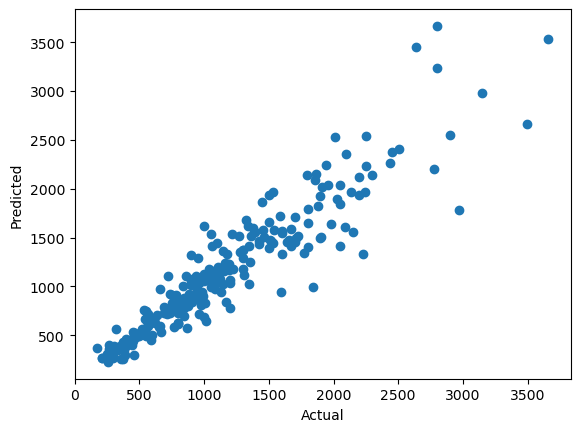

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.858199
7,CatBoosting Regressor,0.853487
6,XGBRegressor,0.826772
4,Decision Tree,0.824587
8,AdaBoost Regressor,0.787832
1,Lasso,0.774948
2,Ridge,0.773828
0,Linear Regression,0.773206
3,K-Neighbors Regressor,0.721074


In [31]:
# En iyi parametreleri yazdır
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli al
best_rf_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yap
y_pred = best_rf_model.predict(X_test)

# Performans metriklerini hesapla
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Sonuçları yazdır
print("\nModel Performans Metrikleri:")
print("R2 Skoru: %.2f" %r2)
print("RMSE: %.2f" %rmse)
print("MAE: %.2f" %mae)

En iyi parametreler: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Model Performans Metrikleri:
R2 Skoru: 85.18
RMSE: 179.48
MAE: 111.66


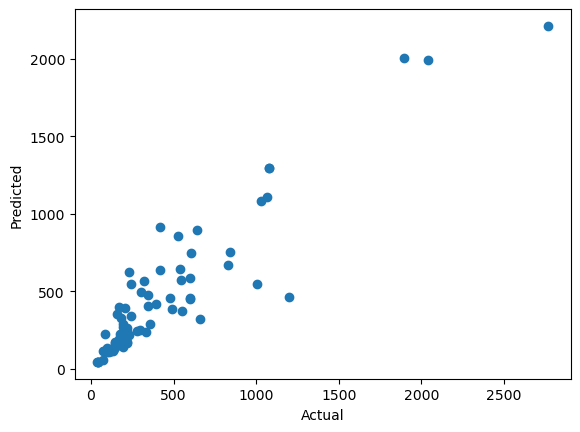

In [32]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

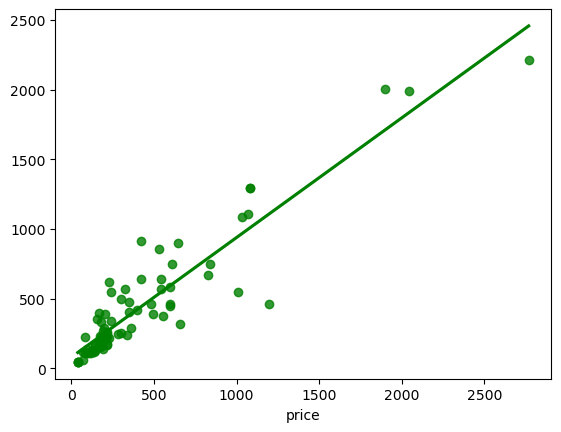

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
9,203.880,392.490096,-188.610096
42,299.988,494.945448,-194.957448
33,227.988,219.599249,8.388751
311,1895.964,2003.759909,-107.795909
272,119.988,122.488695,-2.500695
...,...,...,...
381,203.880,211.498703,-7.618703
3,347.988,403.173690,-55.185690
18,642.432,898.555073,-256.123073
94,826.800,672.430069,154.369931
